<a href="https://colab.research.google.com/github/tina60239/MarketWatchCat/blob/main/20250322_Tina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime as dt
dt.datetime.today(), dt.datetime.now() #取得當前時間

(datetime.datetime(2025, 3, 22, 9, 18, 11, 224854),
 datetime.datetime(2025, 3, 22, 9, 18, 11, 224853))

In [ ]:
dt.datetime.today() - dt.timedelta(days = 365) #今天往前計算一天

datetime.datetime(2024, 3, 22, 9, 22, 1, 834469)

In [ ]:
from dateutil.relativedelta import relativedelta
dt.datetime.today() - relativedelta(years = 2)

datetime.datetime(2023, 3, 22, 9, 24, 35, 58487)

In [ ]:
import datetime as dt
from dateutil.relativedelta import relativedelta

base = dt.datetime.today() - relativedelta(years = 1, months = 6)
while base < dt.datetime.today():
    startdate = base.replace(day = 1).strftime("%Y/%m/%d") #取得當月第一天，並將日期時間轉字串
    endate = (base.replace(day = 1) +
             relativedelta(months = 1) -
             relativedelta(days = 1)).strftime("%Y/%m/%d") #取得當月最後一天，並將日期時間轉字串
    print(startdate, endate)
    base += relativedelta(months = 1) #以月為單位進行累加

2024/03/01 2024/03/31
2024/04/01 2024/04/30
2024/05/01 2024/05/31
2024/06/01 2024/06/30
2024/07/01 2024/07/31
2024/08/01 2024/08/31
2024/09/01 2024/09/30
2024/10/01 2024/10/31
2024/11/01 2024/11/30
2024/12/01 2024/12/31
2025/01/01 2025/01/31
2025/02/01 2025/02/28
2025/03/01 2025/03/31


In [ ]:
import requests
import pandas as pd
from io import StringIO
url = "https://www.taifex.com.tw/cht/3/pcRatio"
payload = {
    "down_type":"",
    "queryStartDate": "2025/02/20",
    "queryEndDate": "2025/03/22"
}
res = requests.get(url, params = payload)
df = pd.read_html(StringIO(res.text))
df[0]

,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
0,2025/3/21,228101,239479,95.25,115456,134595,85.78
1,2025/3/20,214674,210434,102.01,102246,106005,96.45
2,2025/3/19,548397,585988,93.59,54809,71186,76.99
3,2025/3/18,326381,296334,110.14,208530,218268,95.54
4,2025/3/17,300568,278745,107.83,182245,206835,88.11
5,2025/3/14,282606,264639,106.79,160315,193646,82.79
6,2025/3/13,298213,313239,95.20,143014,172573,82.87
7,2025/3/12,711488,631696,112.63,113153,122662,92.25
8,2025/3/11,432651,537746,80.46,173058,220271,78.57
9,2025/3/10,316492,348090,90.92,159939,195984,81.61


In [ ]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import requests
import pandas as pd
from io import StringIO

def pcratio(startdate, enddate):
    url = "https://www.taifex.com.tw/cht/3/pcRatio"
    payload = {
        "down_type":"",
        "queryStartDate": startdate,
        "queryEndDate": enddate
    }
    res = requests.get(url, params = payload)
    df = pd.read_html(StringIO(res.text))
    return df[0]

data = []
base = dt.datetime.today() - relativedelta(years = 1, months = 6)
while base < dt.datetime.today():
    startdate = base.replace(day = 1).strftime("%Y/%m/%d") #取得當月第一天，並將日期時間轉字串
    enddate = (base.replace(day = 1) +
             relativedelta(months = 1) -
             relativedelta(days = 1)).strftime("%Y/%m/%d") #取得當月最後一天，並將日期時間轉字串
    data.append(pcratio(startdate, enddate)) #收集每個月的表格資料
    print(startdate, enddate)
    base += relativedelta(months = 1) #以月為單位進行累加
df = pd.concat(data, ignore_index = True)
df

2023/09/01 2023/09/30
2023/10/01 2023/10/31
2023/11/01 2023/11/30
2023/12/01 2023/12/31
2024/01/01 2024/01/31
2024/02/01 2024/02/29
2024/03/01 2024/03/31
2024/04/01 2024/04/30
2024/05/01 2024/05/31
2024/06/01 2024/06/30
2024/07/01 2024/07/31
2024/08/01 2024/08/31
2024/09/01 2024/09/30
2024/10/01 2024/10/31
2024/11/01 2024/11/30
2024/12/01 2024/12/31
2025/01/01 2025/01/31
2025/02/01 2025/02/28
2025/03/01 2025/03/31


,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
0,2023/9/28,283833,272022,104.34,166908,192291,86.80
1,2023/9/27,532947,505175,105.50,120829,147928,81.68
2,2023/9/26,421773,409734,102.94,230982,265937,86.86
3,2023/9/25,333852,271788,122.84,228459,228604,99.94
4,2023/9/22,289330,276500,104.64,189011,228409,82.75
...,...,...,...,...,...,...,...
369,2025/3/7,239535,262945,91.10,142853,168314,84.87
370,2025/3/6,191010,209440,91.20,129874,145241,89.42
371,2025/3/5,687941,623931,110.26,104393,107734,96.90
372,2025/3/4,521042,511949,101.78,177218,207752,85.30


In [ ]:
df['日期'] = pd.to_datetime(df['日期']) #將日期欄位內容從字串轉成日期時間
df = df.sort_values('日期').reset_index(drop = True) #對日期欄位進行遞增排序，並重設索引值
df

,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
0,2023-09-01,248350,239019,103.90,212099,208233,101.86
1,2023-09-04,350127,311603,112.36,242994,222804,109.06
2,2023-09-05,219787,194175,113.19,259908,240893,107.89
3,2023-09-06,436335,427740,102.01,166813,166136,100.41
4,2023-09-07,249520,252805,98.70,207695,213423,97.32
...,...,...,...,...,...,...,...
369,2025-03-17,300568,278745,107.83,182245,206835,88.11
370,2025-03-18,326381,296334,110.14,208530,218268,95.54
371,2025-03-19,548397,585988,93.59,54809,71186,76.99
372,2025-03-20,214674,210434,102.01,102246,106005,96.45


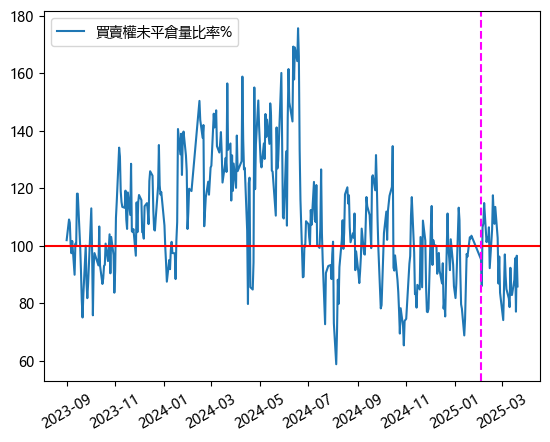

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Microsoft Yahei" #windows
#plt.rcParams['font.family'] = "Arial Unicode MS" #mac os
plt.plot(df['日期'], df['買賣權未平倉量比率%']) #繪製折線圖
plt.xticks(rotation = 30) #調整X軸刻度顯示的角度
plt.legend(['買賣權未平倉量比率%']) #設定圖例
plt.axhline(100, color = 'red') #設定水平線
plt.axvline(dt.datetime(2025, 2, 3), color = '#FF00FF', ls ='--') #設定垂直線

In [ ]:
import requests
import pandas as pd
from io import StringIO
url = "https://mopsov.twse.com.tw/server-java/FileDownLoad"
payload = {
    "step": 9,
    "functionName": "show_file2",
    "filePath": "/t21/sii/",
    "fileName": "t21sc03_114_2.csv"
}
res = requests.get(url, params = payload)
res.encoding = "utf8"
df = pd.read_csv(StringIO(res.text))
df

,出表日期,資料年月,公司代號,公司名稱,產業別,營業收入-當月營收,營業收入-上月營收,營業收入-去年當月營收,營業收入-上月比較增減(%),營業收入-去年同月增減(%),累計營業收入-當月累計營收,累計營業收入-去年累計營收,累計營業收入-前期比較增減(%),備註
0,114/03/22,114/2,1101,台泥,水泥工業,9123490,12213350,4798581,-25.299038,90.128915,21336840,12036511,77.267648,2024/3/6起併入OYAK及Cimpor，以致營收較去年同期增加。
1,114/03/22,114/2,1102,亞泥,水泥工業,4184371,5877674,3599986,-28.809066,16.232980,10062045,10090552,-0.282512,-
2,114/03/22,114/2,1103,嘉泥,水泥工業,218169,268003,201295,-18.594568,8.382722,486172,444255,9.435347,-
3,114/03/22,114/2,1104,環泥,水泥工業,538636,687804,477355,-21.687574,12.837616,1226440,1158116,5.899582,-
4,114/03/22,114/2,1108,幸福,水泥工業,356169,448229,286337,-20.538609,24.388046,804398,743486,8.192757,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,114/03/22,114/2,9944,新麗,其他,209559,180800,144860,15.906527,44.663123,390359,356961,9.356204,-
1037,114/03/22,114/2,9945,潤泰新,其他,2469016,2228463,1640917,10.794570,50.465624,4697479,4541237,3.440516,主係建案交屋認列及子公司潤弘正於大量施工階段，以致本月營收較去年同期增加。
1038,114/03/22,114/2,9946,三發地產,建材營造,3316,3219,2523,3.013358,31.430836,6535,5040,29.662698,-
1039,114/03/22,114/2,9955,佳龍,綠能環保,69106,81744,76868,-15.460462,-10.097830,150850,201392,-25.096330,-


In [ ]:
import datetime as dt
from dateutil.relativedelta import relativedelta

base = dt.datetime.today() - relativedelta(years = 1, months = 6)
while base <= dt.datetime.today():
    date = base.replace(day = 15) - relativedelta(months = 1)
    print("t21sc03_{}_{}.csv".format(date.year-1911, date.month))
    base += relativedelta(months = 1) #以月為單位進行累加

t21sc03_112_8.csv
t21sc03_112_9.csv
t21sc03_112_10.csv
t21sc03_112_11.csv
t21sc03_112_12.csv
t21sc03_113_1.csv
t21sc03_113_2.csv
t21sc03_113_3.csv
t21sc03_113_4.csv
t21sc03_113_5.csv
t21sc03_113_6.csv
t21sc03_113_7.csv
t21sc03_113_8.csv
t21sc03_113_9.csv
t21sc03_113_10.csv
t21sc03_113_11.csv
t21sc03_113_12.csv
t21sc03_114_1.csv
t21sc03_114_2.csv


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.makedirs('/content/drive/My Drive/Colab Notebooks/py', exist_ok=True)

In [8]:
from google.colab import files
uploaded = files.upload()
!mv lib.py /content/drive/My Drive/Colab Notebooks/py/

Saving 1.bat to 1.bat
Saving revenue.py to revenue.py
Saving lib.py to lib.py
Saving quote.py to quote.py
mv: target 'Notebooks/py/' is not a directory


In [11]:
sys.path.append('/content/drive/My Drive/Colab Notebooks/py')

In [22]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.makedirs('/content/drive/My Drive/Colab Notebooks/py', exist_ok=True)

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/py')
#os.getcwd() #取得當前程式碼檔案所在路徑
#sys.path #取得當前程式碼檔案，引用套件或模組的路徑列表

import lib
import importlib
importlib.reload(lib)

lib.countdown(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
00:00


In [ ]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import requests
import pandas as pd
from io import StringIO

#設定 py/lib.py 的路徑
import sys
sys.path.append('./py')
import lib

def revenu(filepath, fileName):
    url = "https://mopsov.twse.com.tw/server-java/FileDownLoad"
    payload = {
        "step": 9,
        "functionName": "show_file2",
        "filePath": filepath,
        "fileName": fileName
    }
    while True:
        try:
            res = requests.get(url, params = payload)
            res.encoding = "utf8"
            if res.text.find("Overrun - 查詢過於頻繁,請稍後再試!!") > -1:
                raise Exception("查詢過於頻繁,請稍後再試!!")
            break
        except Exception as e:
            print(e)
            lib.countdown(10)
            continue
    #print(res.text)
    df = pd.read_csv(StringIO(res.text))
    return df

data = []
base = dt.datetime.today() - relativedelta(years = 1, months = 6)
while base <= dt.datetime.today():
    date = base.replace(day = 15) - relativedelta(months = 1)
    for i in ['sii', 'otc']:
        filepath = "/t21/{}/".format(i)
        fileName = "t21sc03_{}_{}.csv".format(date.year-1911, date.month)
        data.append(revenu(filepath, fileName))
        print(filepath, fileName)
    base += relativedelta(months = 1) #以月為單位進行累加
df = pd.concat(data, ignore_index = True)
df

/t21/sii/ t21sc03_112_8.csv
('Connection aborted.', ConnectionResetError(10054, '遠端主機已強制關閉一個現存的連線。', None, 10054, None))
00:00
/t21/otc/ t21sc03_112_8.csv
/t21/sii/ t21sc03_112_9.csv
/t21/otc/ t21sc03_112_9.csv
/t21/sii/ t21sc03_112_10.csv
/t21/otc/ t21sc03_112_10.csv
/t21/sii/ t21sc03_112_11.csv
/t21/otc/ t21sc03_112_11.csv
/t21/sii/ t21sc03_112_12.csv
/t21/otc/ t21sc03_112_12.csv
/t21/sii/ t21sc03_113_1.csv
/t21/otc/ t21sc03_113_1.csv
/t21/sii/ t21sc03_113_2.csv
/t21/otc/ t21sc03_113_2.csv
/t21/sii/ t21sc03_113_3.csv
/t21/otc/ t21sc03_113_3.csv
查詢過於頻繁,請稍後再試!!
00:00
/t21/sii/ t21sc03_113_4.csv
查詢過於頻繁,請稍後再試!!
00:00
查詢過於頻繁,請稍後再試!!
00:00
/t21/otc/ t21sc03_113_4.csv
/t21/sii/ t21sc03_113_5.csv
/t21/otc/ t21sc03_113_5.csv
查詢過於頻繁,請稍後再試!!
00:00
/t21/sii/ t21sc03_113_6.csv
/t21/otc/ t21sc03_113_6.csv
/t21/sii/ t21sc03_113_7.csv
/t21/otc/ t21sc03_113_7.csv
/t21/sii/ t21sc03_113_8.csv
/t21/otc/ t21sc03_113_8.csv
/t21/sii/ t21sc03_113_9.csv
/t21/otc/ t21sc03_113_9.csv
/t21/sii/ t21sc03_113_10.cs

,出表日期,資料年月,公司代號,公司名稱,產業別,營業收入-當月營收,營業收入-上月營收,營業收入-去年當月營收,營業收入-上月比較增減(%),營業收入-去年同月增減(%),累計營業收入-當月累計營收,累計營業收入-去年累計營收,累計營業收入-前期比較增減(%),備註
0,114/03/22,112/8,1101,台泥,水泥工業,9379408,8953462,10689860,4.757333,-12.258832,72206846,68937060,4.743147,-
1,114/03/22,112/8,1102,亞泥,水泥工業,6469836,6790125,7069221,-4.716982,-8.478798,53547181,59102719,-9.399801,-
2,114/03/22,112/8,1103,嘉泥,水泥工業,238917,266631,182371,-10.394140,31.006026,1882252,1388559,35.554341,-
3,114/03/22,112/8,1104,環泥,水泥工業,617197,637246,605512,-3.146195,1.929772,5009162,4466788,12.142372,-
4,114/03/22,112/8,1108,幸福,水泥工業,430420,441143,390053,-2.430731,10.349106,3286336,2599544,26.419711,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35692,114/03/22,114/2,9949,琉園,文化創意業,9650,12759,11404,-24.367113,-15.380568,22409,29586,-24.258095,-
35693,114/03/22,114/2,9950,萬國通,塑膠工業,174403,218855,234168,-20.311165,-25.522275,393258,463681,-15.187812,-
35694,114/03/22,114/2,9951,皇田,電機機械,455345,509930,368284,-10.704410,23.639637,965275,814713,18.480373,-
35695,114/03/22,114/2,9960,邁達康,運動休閒,62874,48721,47141,29.049075,33.374345,111595,96599,15.523970,-


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35697 entries, 0 to 35696
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   出表日期              35697 non-null  object 
 1   資料年月              35697 non-null  object 
 2   公司代號              35697 non-null  int64  
 3   公司名稱              35697 non-null  object 
 4   產業別               35697 non-null  object 
 5   營業收入-當月營收         35697 non-null  int64  
 6   營業收入-上月營收         35697 non-null  int64  
 7   營業收入-去年當月營收       35697 non-null  int64  
 8   營業收入-上月比較增減(%)    35538 non-null  float64
 9   營業收入-去年同月增減(%)    35513 non-null  float64
 10  累計營業收入-當月累計營收     35697 non-null  int64  
 11  累計營業收入-去年累計營收     35697 non-null  int64  
 12  累計營業收入-前期比較增減(%)  35614 non-null  float64
 13  備註                35694 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 3.8+ MB


In [ ]:
df.columns = list(map(lambda x: x.replace("-", "_")
                                 .replace("(%)", "百分比")
                                 .replace("公司代號", "證券代號")
                                 .replace("公司名稱", "證券名稱"), df.columns))

In [ ]:
if '出表日期' in df.columns: #確認 '出表日期' 是否有出現在欄位名稱中
    df = df.drop('出表日期', axis = 1) #有出現 '出表日期'欄位名稱，則進行刪除
if '證券名稱' in df.columns: #確認 '出表日期' 是否有出現在欄位名稱中
    df = df.drop('證券名稱', axis = 1) #有出現 '出表日期'欄位名稱，則進行刪除
if '產業別' in df.columns: #確認 '出表日期' 是否有出現在欄位名稱中
    df = df.drop('產業別', axis = 1) #有出現 '出表日期'欄位名稱，則進行刪除
if '資料年月' in df.columns: #確認 '資料年月' 是否有出現在欄位名稱中
    df0 = df['資料年月'].str.split("/", expand = True) #對 '資料年月'欄位進行分割
    df0.columns = ["資料年", "資料月"] #將分割後的資料年月，重新設定欄位名稱
    df = pd.merge(df0, df, left_index = True, right_index = True) #將原始表格與資料年月合併
    df = df.drop('資料年月', axis = 1) #刪除 '資料年月' 欄位
df

,資料年,資料月,證券代號,證券名稱,產業別,營業收入_當月營收,營業收入_上月營收,營業收入_去年當月營收,營業收入_上月比較增減百分比,營業收入_去年同月增減百分比,累計營業收入_當月累計營收,累計營業收入_去年累計營收,累計營業收入_前期比較增減百分比,備註
0,112,8,1101,台泥,水泥工業,9379408,8953462,10689860,4.757333,-12.258832,72206846,68937060,4.743147,-
1,112,8,1102,亞泥,水泥工業,6469836,6790125,7069221,-4.716982,-8.478798,53547181,59102719,-9.399801,-
2,112,8,1103,嘉泥,水泥工業,238917,266631,182371,-10.394140,31.006026,1882252,1388559,35.554341,-
3,112,8,1104,環泥,水泥工業,617197,637246,605512,-3.146195,1.929772,5009162,4466788,12.142372,-
4,112,8,1108,幸福,水泥工業,430420,441143,390053,-2.430731,10.349106,3286336,2599544,26.419711,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35692,114,2,9949,琉園,文化創意業,9650,12759,11404,-24.367113,-15.380568,22409,29586,-24.258095,-
35693,114,2,9950,萬國通,塑膠工業,174403,218855,234168,-20.311165,-25.522275,393258,463681,-15.187812,-
35694,114,2,9951,皇田,電機機械,455345,509930,368284,-10.704410,23.639637,965275,814713,18.480373,-
35695,114,2,9960,邁達康,運動休閒,62874,48721,47141,29.049075,33.374345,111595,96599,15.523970,-


In [ ]:
dbname = "台股資料.db"
tablename = "月營收"
columns = df.columns
primarykey = ['資料年', '資料月', '證券代號']
db = lib.operateDB(dbname, tablename, columns, primarykey) #建立資料表
db.insertdata(df) #寫資料到資料庫

In [ ]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import requests
import pandas as pd
from io import StringIO

#設定 py/lib.py 的路徑
import sys
sys.path.append('./py')
import lib

def revenu(filepath, fileName):
    url = "https://mopsov.twse.com.tw/server-java/FileDownLoad"
    payload = {
        "step": 9,
        "functionName": "show_file2",
        "filePath": filepath,
        "fileName": fileName
    }
    while True:
        try:
            res = requests.get(url, params = payload)
            res.encoding = "utf8"
            if res.text.find("Overrun - 查詢過於頻繁,請稍後再試!!") > -1:
                raise Exception("查詢過於頻繁,請稍後再試!!")
            break
        except Exception as e:
            print(e)
            lib.countdown(10)
            continue
    #print(res.text)
    df = pd.read_csv(StringIO(res.text))
    return df

def get_revenu(years = 1, months = 6):
    data = []
    base = dt.datetime.today() - relativedelta(years = years, months = months)
    while base <= dt.datetime.today():
        date = base.replace(day = 15) - relativedelta(months = 1)
        for i in ['sii', 'otc']:
            filepath = "/t21/{}/".format(i)
            fileName = "t21sc03_{}_{}.csv".format(date.year-1911, date.month)
            data.append(revenu(filepath, fileName))
            print(filepath, fileName)
        base += relativedelta(months = 1) #以月為單位進行累加
    df = pd.concat(data, ignore_index = True)
    return df

def transfer_columns(df):
    df.columns = list(map(lambda x: x.replace("-", "_")
                                     .replace("(%)", "百分比")
                                     .replace("公司代號", "證券代號")
                                     .replace("公司名稱", "證券名稱"), df.columns))
    if '出表日期' in df.columns: #確認 '出表日期' 是否有出現在欄位名稱中
        df = df.drop('出表日期', axis = 1) #有出現 '出表日期'欄位名稱，則進行刪除
    if '證券名稱' in df.columns: #確認 '證券名稱' 是否有出現在欄位名稱中
        df = df.drop('證券名稱', axis = 1) #有出現 '證券名稱'欄位名稱，則進行刪除
    if '產業別' in df.columns: #確認 '產業別' 是否有出現在欄位名稱中
        df = df.drop('產業別', axis = 1) #有出現 '產業別'欄位名稱，則進行刪除
    df = df.drop('產業別', axis = 1) #有出現 '出表日期'欄位名稱，則進行刪除
    if '資料年月' in df.columns: #確認 '資料年月' 是否有出現在欄位名稱中
        df0 = df['資料年月'].str.split("/", expand = True) #對 '資料年月'欄位進行分割
        df0.columns = ["資料年", "資料月"] #將分割後的資料年月，重新設定欄位名稱
        df = pd.merge(df0, df, left_index = True, right_index = True) #將原始表格與資料年月合併
        df = df.drop('資料年月', axis = 1) #刪除 '資料年月' 欄位
    return df

def main():
    dbname = "台股資料.db"
    tablename = "月營收"

    print("開始取得月營收")
    df = get_revenu() #取得月營收
    print("結束抓取月營收")
    print("資料欄位轉換")
    df = transfer_columns(df) #轉換資料欄位

    columns = df.columns
    primarykey = ['資料年', '資料月', '證券代號']
    print("建立月營收資料表物件")
    db = lib.operateDB(dbname, tablename, columns, primarykey) #建立資料表
    print("資料寫入資料庫")
    db.insertdata(df) #寫資料到資料庫
    print("資料抓取完成並寫入資料庫!!")

if __name__== "__main__":
    main()

開始取得月營收
/t21/sii/ t21sc03_112_8.csv
/t21/otc/ t21sc03_112_8.csv
/t21/sii/ t21sc03_112_9.csv
/t21/otc/ t21sc03_112_9.csv
/t21/sii/ t21sc03_112_10.csv
/t21/otc/ t21sc03_112_10.csv
/t21/sii/ t21sc03_112_11.csv
/t21/otc/ t21sc03_112_11.csv
/t21/sii/ t21sc03_112_12.csv
/t21/otc/ t21sc03_112_12.csv
/t21/sii/ t21sc03_113_1.csv
/t21/otc/ t21sc03_113_1.csv
/t21/sii/ t21sc03_113_2.csv
/t21/otc/ t21sc03_113_2.csv
/t21/sii/ t21sc03_113_3.csv
/t21/otc/ t21sc03_113_3.csv
/t21/sii/ t21sc03_113_4.csv
/t21/otc/ t21sc03_113_4.csv
/t21/sii/ t21sc03_113_5.csv
/t21/otc/ t21sc03_113_5.csv
/t21/sii/ t21sc03_113_6.csv
查詢過於頻繁,請稍後再試!!
00:00
查詢過於頻繁,請稍後再試!!
00:00
/t21/otc/ t21sc03_113_6.csv
/t21/sii/ t21sc03_113_7.csv
/t21/otc/ t21sc03_113_7.csv
/t21/sii/ t21sc03_113_8.csv
/t21/otc/ t21sc03_113_8.csv
/t21/sii/ t21sc03_113_9.csv
/t21/otc/ t21sc03_113_9.csv
/t21/sii/ t21sc03_113_10.csv
/t21/otc/ t21sc03_113_10.csv
/t21/sii/ t21sc03_113_11.csv
/t21/otc/ t21sc03_113_11.csv
/t21/sii/ t21sc03_113_12.csv
/t21/otc/ t21sc

In [ ]:
%save revenue.py 34

The following commands were written to file `revenue.py`:
import datetime as dt
from dateutil.relativedelta import relativedelta
import requests
import pandas as pd
from io import StringIO

#設定 py/lib.py 的路徑
import sys
sys.path.append('./py')
import lib

def revenu(filepath, fileName):
    url = "https://mopsov.twse.com.tw/server-java/FileDownLoad"
    payload = {
        "step": 9,
        "functionName": "show_file2",
        "filePath": filepath,
        "fileName": fileName
    }
    while True:
        try:
            res = requests.get(url, params = payload)
            res.encoding = "utf8"
            if res.text.find("Overrun - 查詢過於頻繁,請稍後再試!!") > -1:
                raise Exception("查詢過於頻繁,請稍後再試!!") 
            break
        except Exception as e:
            print(e)
            lib.countdown(10)
            continue            
    #print(res.text)
    df = pd.read_csv(StringIO(res.text))
    return df

def get_revenu(years = 1, months = 6):
    data = []
    base = dt.dat

In [ ]:
import requests
import pandas as pd
from io import StringIO
from bs4 import BeautifulSoup as bs
url = "https://mopsov.twse.com.tw/mops/web/ajax_t51sb01"
payload = {
    "encodeURIComponent": 1,
    "step": 1,
    "firstin": 1,
    "TYPEK": "sii",
    "code": ""
}
res = requests.get(url, params = payload) #連結公開資訊觀測站
soup = bs(res.text, "lxml") #解析網頁HTML原始碼
inp  = soup.select("input[type=hidden]") #尋找符合的節點
for i in inp: #尋找檔案名稱
    if i['name'] == "filename": #比對含有 filename 節點
        filename = i['value'] #取得檔案名稱
url = "https://mopsov.twse.com.tw/server-java/t105sb02"
payload = {
    "firstin": "true",
    "step": 10,
    "filename": filename #帶入檔案名稱
}
res = requests.get(url, params = payload) #連結公開資訊觀測站
res.encoding = "big5"
df = pd.read_csv(StringIO(res.text)) #取得基本資料CSV檔案
df

,公司代號,公司名稱,公司簡稱,產業類別,外國企業註冊地國,住址,營利事業統一編號,董事長,總經理,發言人,...,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,公司網址,投資人關係聯絡人,投資人關係聯絡人職稱,投資人關係聯絡電話,投資人關係聯絡電子郵件,公司網站內利害關係人專區網址
0,1101,臺灣水泥股份有限公司,台泥,水泥工業,－,台北市中山北路2段113號,11913502,張安平,程耀輝,葉毓君,...,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,https://www.tccgroupholdings.com/tw/,永續辦公室,永續辦公室,02-25317099,ir@taiwancement.com,https://www.tccgroupholdings.com/tw/esgStakeho...
1,1102,亞洲水泥股份有限公司,亞泥,水泥工業,－,台北市大安區敦化南路2段207號30、31樓,3244509,徐旭東,李坤炎,王照宇,...,ACC,"30-31F., No.207, Sec. 2, Dunhua S. Rd., Da' an...",02-2378-5191,service@acc.com.tw,www.acc.com.tw,陳韋仲,投資人關係經理,02 27338000 ext.8336,ir@acc.com.tw,http://www.acc.com.tw/tw/stakeholder/stakehold...
2,1103,嘉新水泥股份有限公司,嘉泥,水泥工業,－,台北市中山北路2段96號,11892801,張剛綸,王立心,金哲毅,...,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,ir@chcgroup.com.tw,www.chcgroup.com.tw,金哲毅,永續發展辦公室經理,(02)2551-5211#277,ir@chcgroup.com.tw,www.chcgroup.com.tw/index.php?route=system/sys...
3,1104,環球水泥股份有限公司,環泥,水泥工業,－,台北市南京東路二段125號10樓,7568009,博智投資股份有限公司,侯智升,楊宗仁,...,UCC,"10th F., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com,楊宗仁,副總經理,02-2507-7801,p1590@ucctw.com,http://www.ucctw.com/m/412-1518-12822.php?Lang...
4,1108,幸福水泥股份有限公司,幸福,水泥工業,－,台北市松江路237號15樓,40601248,陳韻如,陳明賢,溫秀菊,...,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,wendy@luckygrp.com.tw,www.luckygrp.com.tw,溫秀菊,財務部經理,25092188,wendy@luckygrp.com.tw,http://www.luckygrp.com.tw/tw/index.asp?au_id=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,9944,新麗企業股份有限公司,新麗,其他,－,桃園市八德區聯華街41號,33375909,簡瑞瑞,簡榮富,簡裘裘,...,Shinih,"No.41, Lianhua StBade Dist., Taoyuan City 334,...",(03)3653635,ir@shinih.com,www.shinih.com.tw,施中南,副總經理,03-3659903,ir@shinih.com,https://www.shinih.com/stakeholder
1045,9945,潤泰創新國際股份有限公司,潤泰新,其他,－,台北市八德路二段三０八號十一樓之一,12139612,簡滄圳,李志宏,陳柏宇,...,RUENTEX DEVELOP,"11/F,No.308,Section 2, Bade Road,Taipei,Taiwan...",81617968,cmc@mail.ruentex.com.tw,www.rt-develop.com.tw,陳柏宇,協理,81619888,RT015630@mail.ruentex.com.tw,www.rt-develop.com.tw
1046,9946,三發地產股份有限公司,三發地產,建材營造,－,台北市松山區八德路3段30號12樓,84466749,鍾鼎晟,楊題銓,蔡文玲,...,SANFAR,"12F, No.30, Section 3, Bade Road, Songshan Dis...",02-2570-6985,contact01@sanfar.com.tw,https://www.sanfar.com.tw,蔡文玲,投資人關係,02-2570-9988,contact01@sanfar.com.tw,https://www.sanfar.com.tw/zh-TW/investor#inves...
1047,9955,佳龍科技工程股份有限公司,佳龍,綠能環保,－,桃園市觀音區大潭里一鄰環科路323號,97211972,吳界欣,楊明曄,陸怡豪,...,SDTI,"No.323,Huanke Rd.,Guanyin Dist.,Taoyuan 328,Ta...",(03)473-5259,service@sdti.com.tw,www.sdti.com.tw,陸怡豪,策略顧問,(03)4736566,service@sdti.com.tw,https://www.sdti.com.tw/investors_shareholder....
